Mengubah gambar menjadi grayscale untuk kemudian melanjutkan dengan clipping dan menormalisasi sebelum akhirnya menampilkan histogramnya.

4 line dibawah merupakan 4 baris kode python yang mengimpor 4 library berbeda yaitu:numpy merupakan sebuah library untuk komputasi numerik dalam Python, digunakan untuk operasi array dan matriks yang efisien. matplotlib.pyplot merupakan sebuah library untuk visualisasi data dalam bentuk plot, histogram, dan diagram lainnya. matplotlib.image menyediakan fungsi untuk membaca dan menulis gambar dalam berbagai format, seperti PNG, JPEG, dan lainnya. cv2 merupakan Sebuah library untuk pemrosesan gambar dan video, biasanya digunakan untuk membaca, menulis, dan memanipulasi citra.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import cv2 as cv

line dibawah ini merupakan inisialisasi sebuah variabel untuk menampilkan gambar menggunakan plt.imread yang digunakan untuk membaca sebuah file gambar dari suatu lokasi tertentu setelah citra dinisialisasi untuk menanmpilkan gambar digunakan plt.imshow untuk menampilkan citra pada program seperti pada output yang ditampilkan setelah code dibawah ini.

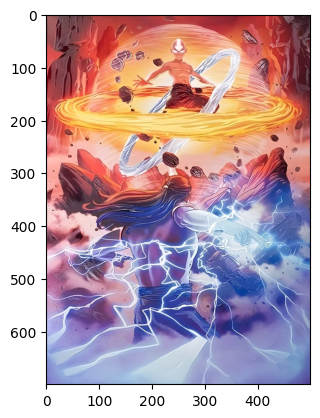

In [8]:
img = mping.imread ("images/aang.jpg")

plt.imshow (img)
plt.show ()

script di bawah ini berisi fungsi yang digunakan untuk merubah warna dari citra ke dalam yang akan dikeluarkan. Fungsi ini juga nantinya akan mengembalikan hasil pengubahan citra yang telah dilakukan. 
pada gray_img dilakukan perubahan warna citra yang sebelumnya RGB menjadi grayscale menggunakan syntax "cv.cvtColor" dimana berarti akan mengkonversi warna dari RGB kedalam warna gray, lalu terdapat perintah untuk menampilkan citra yang diimport dengan mode grayscale dengan fungsi imshow dari library matplotlib.pyplot.

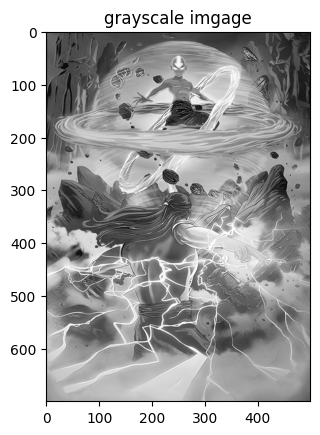

In [9]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.title('grayscale imgage')
plt.show()

Melakukan clipping pada gambar grayscale untuk memastikan bahwa semua nilai piksel berada dalam rentang yang diinginkan, dan kemudian mencetak matriks pixel yang telah diproses.

In [10]:
Clip_img = np.clip(gray_img, 0, 256)
print("\nMatriks elemen pixel setelah clipping:")
for row in Clip_img:
    print(row)


Matriks elemen pixel setelah clipping:
[156 110 123 121 119 115 111 106 105 103 102 101 101 101 100  99 101 101
 104 105 104 105 104 104 104  99 100 103 101  99 100  97  90 104 100  91
  99  96  97  93  91  92  95  93  91  84  74  78 100  98  87  77  87  92
  84  92 102  88  83  91  93  82  83  91  90  87  84  89  86  82  82  84
  83  85  84  84  82  82  82  82  84  84  87  87  93  95  93  94  94  89
  89  90  87  89  91  89  89  89  88  88  87  87  88  88  89  88  87  87
  86  86  85  85  84  84  83  82  82  82  83  83  81  81  81  81  81  81
  81  81  81  81  82  81  81  80  80  80  79  79  80  80  80  79  77  77
  80  79  79  77  76  75  75  75  74  73  73  73  73  74  76  76  77  77
  77  77  77  77  77  78  77  78  79  79  80  80  79  79  81  81  82  83
  83  83  83  82  81  81  81  81  82  84  85  85  84  83  82  83  84  85
  84  84  85  85  84  84  84  84  83  83  83  84  84  84  84  83  83  83
  85  82  84  83  82  82  76  81  83  82  80  78  79  81  82  81  79  78
  81  82  7

Script di bawah ini melakukan proses penghitungan histogram dari gambar yang telah diproses dengan clipping, kemudian melakukan normalisasi untuk mendapatkan distribusi probabilitas piksel yang merata, dan akhirnya menghitung histogram kumulatif.

In [11]:
hist, _ = np.histogram(Clip_img.flatten(), bins=256, range=(0, 255))
sum_hist = np.sum(hist)
normalized_hist = hist / sum_hist  # Normalisasi histogram
cumulative_hist = np.cumsum(normalized_hist)

Script di bawah ini menghitung indeks untuk nilai grayscale. Menggunakan fungsi np.arange(256) ini menghasilkan numpy yang berisi urutan angka dari 0 hingga 255.

In [12]:
grayIndex = np.arange(256)

Menampilkan histogram setelah melakukan proses clipping dan normalisasi, dengan menampilkan intensitas piksel pada sumbu x dan probabilitasnya pada sumbu y. Pada script dibawah ini terdapat pltylim() yang digunakan untuk menentukan batas atas dan bawah dari sumbu y pada plot. Dalam kasus ini, batas y diatur dari 0 hingga 0.01 untuk memperjelas visualisasi histogram yang dinormalisasi. 

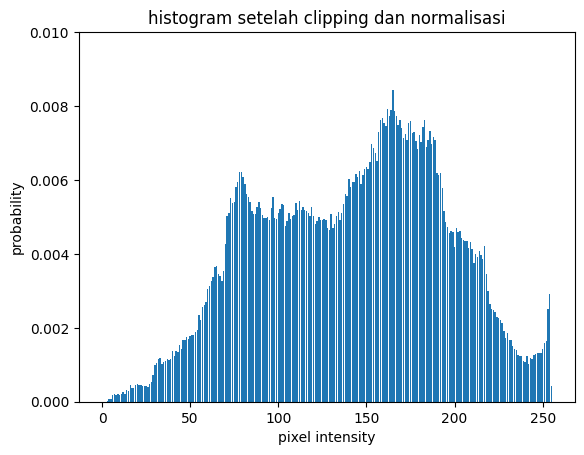

In [13]:
plt.bar(np.arange(256), normalized_hist)
plt.ylim(0, 0.01)
plt.title('histogram setelah clipping dan normalisasi')
plt.xlabel('pixel intensity')
plt.ylabel('probability')
plt.show()